# Gradient Detection Test
Testing derivative of Gaussian kernels on webcam feed

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from scipy import ndimage

## Open Webcam and Show Live Feed

## Create Derivative of Gaussian Kernel

Sum: -0.000000 (should be ~0)
Kernel size: 15


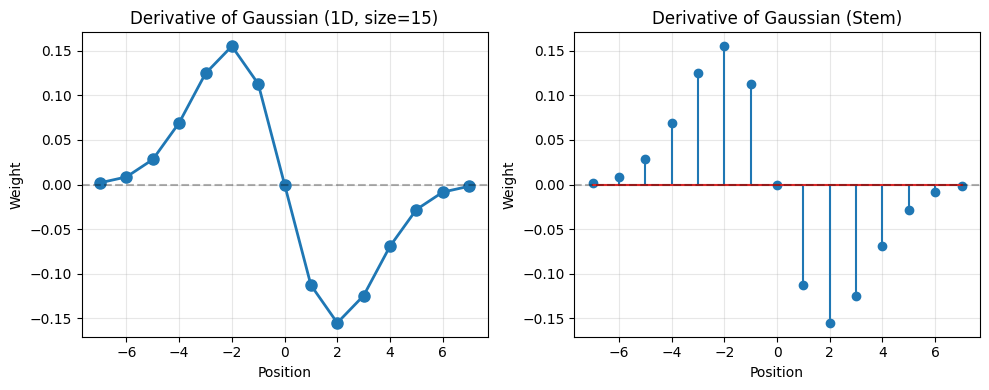

In [28]:
# Create 1D Derivative of Gaussian kernel
ksize = 15  # Bigger kernel
sigma = 2.0

x = np.arange(ksize) - ksize // 2

# Derivative of Gaussian: -x/sigma^2 * exp(-x^2/(2*sigma^2))
dog_1d = -(x / sigma**2) * np.exp(-x**2 / (2 * sigma**2))
dog_1d = dog_1d / np.sum(np.abs(dog_1d))  # Normalize

print(f"Sum: {np.sum(dog_1d):.6f} (should be ~0)")
print(f"Kernel size: {ksize}")

# Plot it
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, dog_1d, 'o-', linewidth=2, markersize=8)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title(f'Derivative of Gaussian (1D, size={ksize})')
plt.xlabel('Position')
plt.ylabel('Weight')

plt.subplot(1, 2, 2)
plt.stem(x, dog_1d)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title('Derivative of Gaussian (Stem)')
plt.xlabel('Position')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()

In [29]:
# Open webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam")
else:
    print("Webcam opened successfully")
    print("Run the next cell to start live view")

Webcam opened successfully
Run the next cell to start live view


In [30]:
# Live view with derivative of Gaussian in both X and Y directions
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Can't receive frame")
            break
        
        # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
        
        # Apply 1D derivative of Gaussian in horizontal direction (X gradient)
        dog_x = np.zeros_like(gray)
        for i in range(gray.shape[0]):
            dog_x[i, :] = np.convolve(gray[i, :], dog_1d, mode='same')
        
        # Apply 1D derivative of Gaussian in vertical direction (Y gradient)
        dog_y = np.zeros_like(gray)
        for j in range(gray.shape[1]):
            dog_y[:, j] = np.convolve(gray[:, j], dog_1d, mode='same')
        
        # Display
        clear_output(wait=True)
        plt.figure(figsize=(18, 5))
        
        plt.subplot(1, 3, 1)
        plt.imshow(gray, cmap='gray')
        plt.title('Original (Grayscale)')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(dog_x, cmap='seismic', vmin=-50, vmax=50)
        plt.colorbar()
        plt.title('Gradient X (Horizontal edges)')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(dog_y, cmap='seismic', vmin=-50, vmax=50)
        plt.colorbar()
        plt.title('Gradient Y (Vertical edges)')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
except KeyboardInterrupt:
    print("Stopped by user")

Stopped by user


Stopped by user


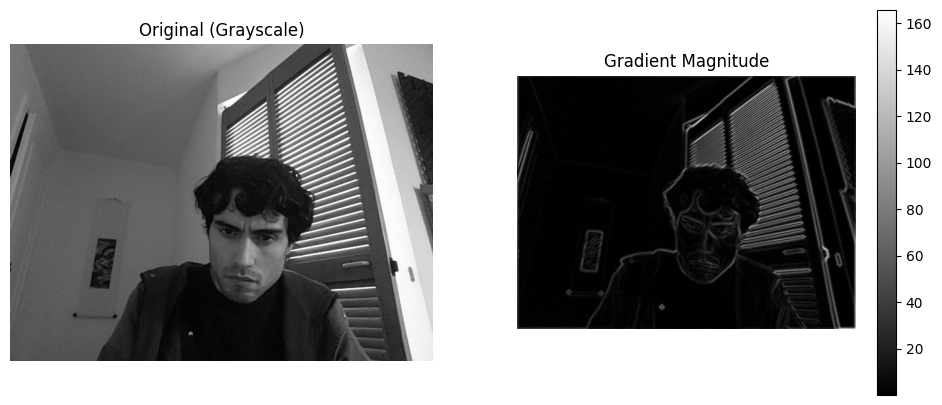

In [34]:
# Live view with gradient magnitude
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Can't receive frame")
            break
        
        # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
        
        # Apply 1D derivative of Gaussian in horizontal direction (X gradient)
        dog_x = np.zeros_like(gray)
        for i in range(gray.shape[0]):
            dog_x[i, :] = np.convolve(gray[i, :], dog_1d, mode='same')
        
        # Apply 1D derivative of Gaussian in vertical direction (Y gradient)
        dog_y = np.zeros_like(gray)
        for j in range(gray.shape[1]):
            dog_y[:, j] = np.convolve(gray[:, j], dog_1d, mode='same')
        
        # Compute gradient magnitude
        gradient_magnitude = np.sqrt(dog_x**2 + dog_y**2)
        
        # Display
        clear_output(wait=True)
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(gray, cmap='gray')
        plt.title('Original (Grayscale)')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.colorbar()
        plt.title('Gradient Magnitude')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
except KeyboardInterrupt:
    print("Stopped by user")

In [36]:
# Live view with Sobel gradient for comparison
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Can't receive frame")
            break
        
        # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)
        
        # Apply Sobel in X and Y directions
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        
        # Compute gradient magnitude
        sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
        
        # Display
        clear_output(wait=True)
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(gray, cmap='gray')
        plt.title('Original (Grayscale)')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(sobel_magnitude, cmap='gray')
        plt.colorbar()
        plt.title('Sobel Gradient Magnitude')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
except KeyboardInterrupt:
    print("Stopped by user")

Stopped by user


In [37]:
# Release webcam when done
cap.release()
print("Webcam released")

Webcam released
